In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)  # Adjusts the configuration of the plots we will create

# Read the data

In [2]:
df = pd.read_csv(r"C:\Users\Dr. J .R Junghare\Desktop\Datasets\diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Renaming the column

In [4]:
df.rename(columns = {'Unnamed: 0' : 'Serial No.'}, inplace = True);

In [5]:
df.head()

,Serial No.,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
## As given the description of dataset that x,y,z are length, width and depth respectively
## depth is total depth%

In [6]:
df.rename(columns = {'x' : 'length', 'y' : 'width', 'z' : 'depth', 'depth' : 'depth%'}, inplace = True);

In [7]:
df.head()

,Serial No.,carat,cut,color,clarity,depth%,table,price,length,width,depth
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Looking at how many total number of rows and columns

In [9]:
df.shape

(53940, 11)

# Summary of dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Serial No.  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth%      53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   length      53940 non-null  float64
 9   width       53940 non-null  float64
 10  depth       53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# Statistical summary of dataframe

In [11]:
df.describe()

,Serial No.,carat,depth%,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
## As you can see i the above table that the minimum value of length,width and depth is zero.
## Which cannot be true as a diamond cannot be dimensionless

In [12]:
#Dropping dimensionless features

df = df.drop(df[df['length'] == 0].index)
df = df.drop(df[df['width'] == 0].index)
df = df.drop(df[df['depth'] == 0].index)

In [13]:
df.describe() # Now the minimum of length, width and depth is not zero

,Serial No.,carat,depth%,table,price,length,width,depth
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Checking whether columns has any missing values

In [14]:
df.isnull().sum()

Serial No.    0
carat         0
cut           0
color         0
clarity       0
depth%        0
table         0
price         0
length        0
width         0
depth         0
dtype: int64

#  Plotting graph between carat and price using seaborn

<AxesSubplot:xlabel='carat', ylabel='price'>

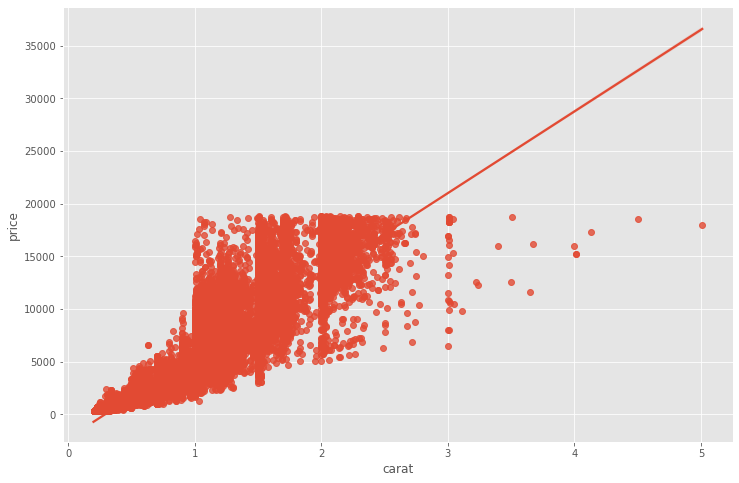

In [15]:
sns.regplot(x="carat", y="price", data=df)

<AxesSubplot:xlabel='carat', ylabel='price'>

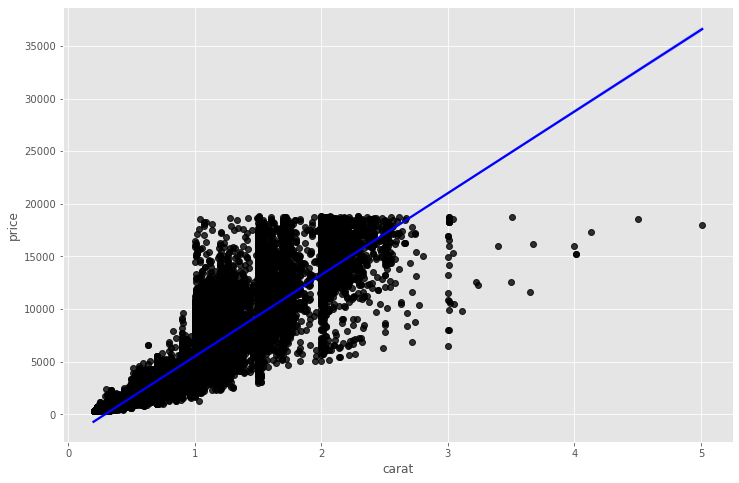

In [16]:
sns.regplot( x = 'carat', y= 'price', data = df, scatter_kws = {"color": "black"}, line_kws = {"color": "blue"})

Text(0.5, 1.0, 'carat vs price ')

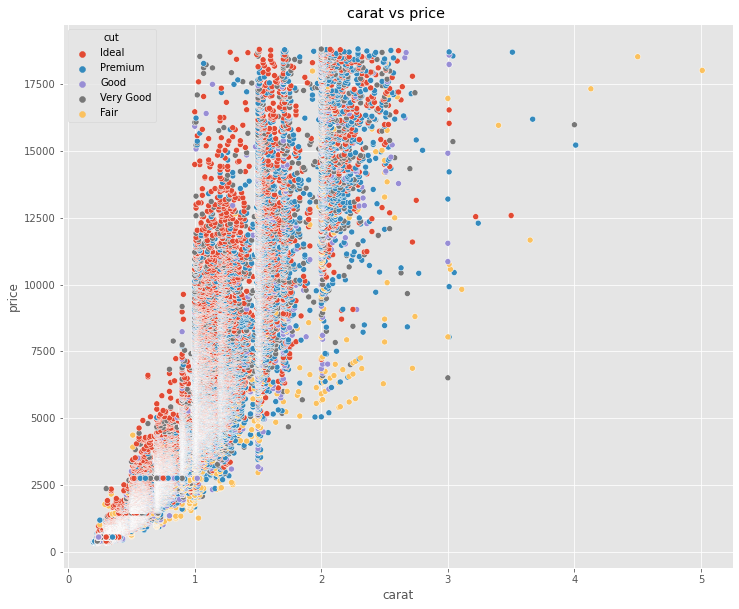

In [20]:
plt.figure(figsize = (12,10))
axis = sns.scatterplot(x = "carat", y = "price", data = df, hue = "cut")
plt.title('carat vs price ')

# Finding the coorelation

In [21]:
df.corr(method = 'pearson')

,Serial No.,carat,depth%,table,price,length,width,depth
Serial No.,1.000000,-0.378173,-0.035058,-0.100872,-0.307092,-0.406331,-0.396480,-0.401758
carat,-0.378173,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth%,-0.035058,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,-0.100872,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,-0.307092,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
length,-0.406331,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
width,-0.396480,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
depth,-0.401758,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


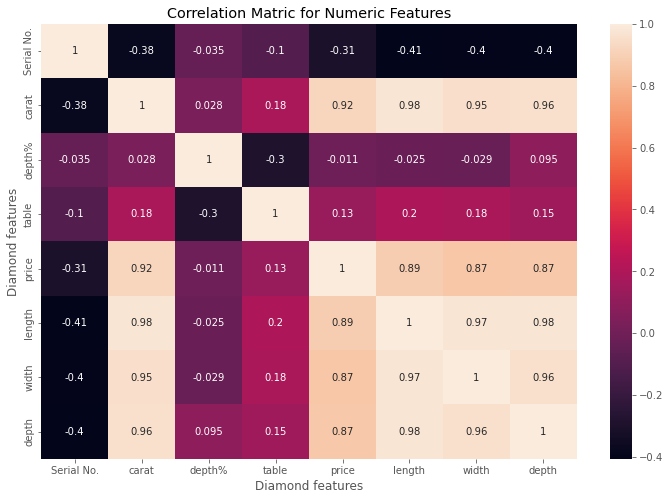

In [22]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Diamond features')

plt.ylabel('Diamond features')

plt.show()

In [23]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,Serial No.,carat,cut,color,clarity,depth%,table,price,length,width,depth
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


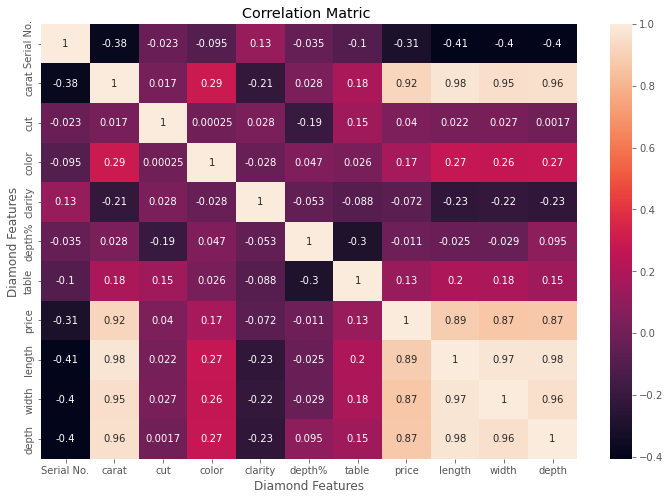

In [24]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric ')

plt.xlabel('Diamond Features')

plt.ylabel('Diamond Features')

plt.show()

In [25]:
df_numerized.corr()

,Serial No.,carat,cut,color,clarity,depth%,table,price,length,width,depth
Serial No.,1.000000,-0.378173,-0.023274,-0.095062,0.125143,-0.035058,-0.100872,-0.307092,-0.406331,-0.396480,-0.401758
carat,-0.378173,1.000000,0.017193,0.291360,-0.214227,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
cut,-0.023274,0.017193,1.000000,0.000253,0.028196,-0.194309,0.150708,0.039889,0.022007,0.027305,0.001678
color,-0.095062,0.291360,0.000253,1.000000,-0.027689,0.047373,0.026481,0.172431,0.270671,0.263915,0.270011
clarity,0.125143,-0.214227,0.028196,-0.027689,1.000000,-0.053200,-0.088028,-0.071570,-0.225963,-0.217730,-0.226215
depth%,-0.035058,0.028259,-0.194309,0.047373,-0.053200,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,-0.100872,0.181646,0.150708,0.026481,-0.088028,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,-0.307092,0.921592,0.039889,0.172431,-0.071570,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
length,-0.406331,0.977779,0.022007,0.270671,-0.225963,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
width,-0.396480,0.953991,0.027305,0.263915,-0.217730,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744


In [26]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

Serial No.  Serial No.    1.000000
            carat        -0.378173
            cut          -0.023274
            color        -0.095062
            clarity       0.125143
                            ...   
depth       table         0.152483
            price         0.868206
            length        0.975435
            width         0.956744
            depth         1.000000
Length: 121, dtype: float64

In [27]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

Serial No.  length       -0.406331
length      Serial No.   -0.406331
Serial No.  depth        -0.401758
depth       Serial No.   -0.401758
width       Serial No.   -0.396480
                            ...   
color       color         1.000000
cut         cut           1.000000
carat       carat         1.000000
width       width         1.000000
depth       depth         1.000000
Length: 121, dtype: float64

In [28]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

price       width         0.867864
width       price         0.867864
price       depth         0.868206
depth       price         0.868206
price       length        0.887231
length      price         0.887231
carat       price         0.921592
price       carat         0.921592
width       carat         0.953991
carat       width         0.953991
width       depth         0.956744
depth       width         0.956744
carat       depth         0.961048
depth       carat         0.961048
length      width         0.974918
width       length        0.974918
depth       length        0.975435
length      depth         0.975435
            carat         0.977779
carat       length        0.977779
Serial No.  Serial No.    1.000000
depth%      depth%        1.000000
length      length        1.000000
price       price         1.000000
table       table         1.000000
clarity     clarity       1.000000
color       color         1.000000
cut         cut           1.000000
carat       carat   

In [ ]:
# As you can see that price of a diamond is highly correlated with the size of the carat, length, width and depth